<a href="https://colab.research.google.com/github/Ayman947/Automated_Portfolio_Allocation/blob/main/Automated_Portfolio_Allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assets Allocation & Portfolio Statistical Analysis**
#### By Ayman Altaweel



## **Intro**


> In this notebook, we are going to perform:

>1. **Descriptive** analysis of **9** USA **stocks** from **2012** to **2020**.
>2. **Automated** stock portfolio **allocation**, **statistical analysis**, and **visualization**. 
>3. **Automated** financial investment **decisions**.

> The portfolio will be a collection of <u>stocks</u>. Also, It may include other financial securities such as <u>stocks</u>, <u>bonds</u>, and <u>ETFs</u>.

> We are going to create functions, in order to <u>allocate the assets</u>, and calculate a portfolio’s <u>risk</u>, <u>returns</u>, and <u>Sharpe ratio</u>.

> Finally, this notebook will guide us on how to allocate assets and financial investments. In a way that <u>*meets the client’s risk-adjusted return preferences*</u>.

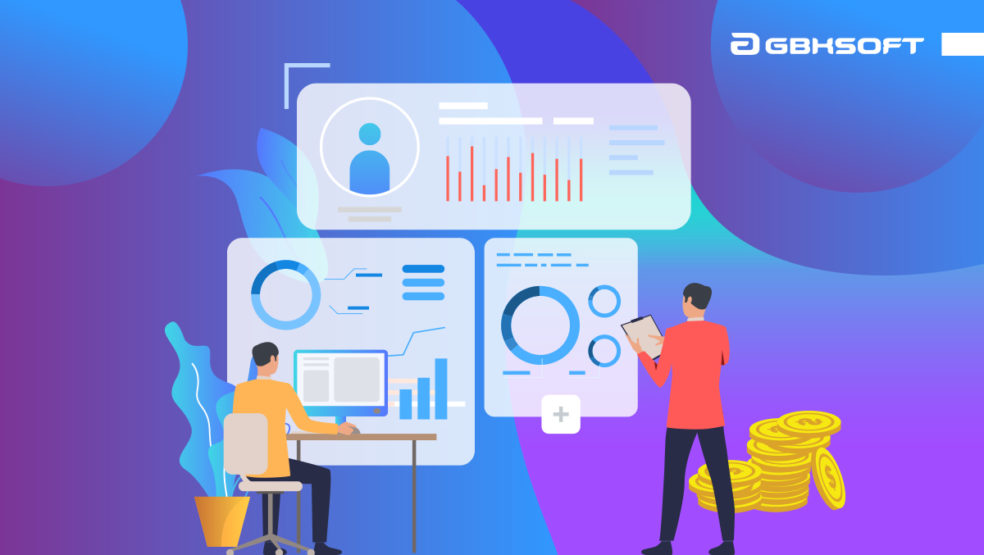



## ---
## ---
## ---


### **Importing** libraries & datasets

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Numpy is for numerical calculations and array manipulations
import numpy as np

# Pandas is for dataFrame Manipulation
import pandas as pd

# Essential Data Visualization libraries
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Interactive Data Vizualization libraries
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Copy is for copying dataframes
from copy import copy

from scipy import stats

In [ ]:
#### Reading our dataset into a data frame
Stocks_df = pd.read_csv('/content/drive/My Drive/Python for Finance/Part 2. Financial Analysis in Python/stock.csv')
Stocks_df.head(5)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000



## Brief **overview** of the dataset

### The structure of the dataset:

In [ ]:
Stocks_df.shape

> The dataset consists of **2,159** rows & **10** columns

### The main features of interest in the dataset:

In [ ]:
# Print the columns names
[ print(col) for col in Stocks_df.columns ];

> **AAPL** = Apple Stocks

> **BA**= Boeing Stocks

> **T** = AT&T Stocks

> **MGM** = MGM Resorts International (Hotel Industry) Stocks

> **AMZN** = Amazon Stocks

> **IBM** = IBM Stocks

> **TSLA** = Tesla Motors Stocks

> **GOOG**= Google Stocks

> **sp500** = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange).



---



---



---



## Data **wrangling**  & Data quality assurance

> Ordering the data by date in order to be **chronologically reliable**.

In [ ]:
# Sorting the data by date
Stocks_df = Stocks_df.sort_values( by = 'Date', ascending= True)

> Dealing with duplicates for the sake of **uniqueness**.

In [ ]:
# Getting duplicates from our dataset:
Stocks_df.duplicated().value_counts()

False    2159
dtype: int64


> Dealing with null values for the sake of **completeness**.


In [ ]:
# Detecting null values in our dataset:
Stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

### Throughout the previous data wrangling, I have assured that the data are:


*  Having a proper **naming conventions**. 
*  Having a relevant **data types**.
*  **Chronologically** reliable. 
*  **Unique** entries. (i.e No duplicates)
* **Complete**. (i.e No nulls)
* **Normalized** or **Scaled**.
*  Having **valid**, **accurate**, and **consistent** values. 
*  **Current** & **up-to-date**.

## ---
## ---
## ---

## Brief **summary statistics** for numerical data within the dataset.

In [ ]:
Stocks_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


> We can easily determine the **min**, the **max**, and the **average** of each **stock**.

> Also, we can determine which one is more or less **risky** than the other by referencing to **std**.

> EX: **T** stocks are the **lowest in risk**. While **AMZN** is the **riskiest**.





## **Visualizing** stocks data

##### Absolute trends of **stock**'s **prices** from 2012 - 2020 (i.e **Raw data** )



In [ ]:
# Defining a function to perform an interactive data plotting using plotly express.
# Plotly.express module has been imported earlier in the notebook as px. It includes functions that can plot interactive plots easily and effectively.
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance.

def interactive_plot( DF, Col_X_Axis, fig_title):

# Instantiating a graph object
  fig = px.line( title= fig_title );

# Adding a scatter trace to the graph object
  for col in DF.columns[1:]:
    fig.add_scatter( x = DF[Col_X_Axis] , y = DF[col] , name = col )

# Showing the plotly.graph_objects.Figure instance
  fig.show()

# Plotting an interactive chart for the Absolute-valued dataframe
interactive_plot( Stocks_df, 'Date', "Absolute trends of stock's prices from 2012 - 2020 (i.e Raw data)")

> Referencing the interactive chart above:

> We can notice that there is a clear **drop** in the **Prices** within the **1st quarter** of 2020 due to **COVID-19**.

> Also, We can determine the net increase or decrease in absolute stock's prices whether individually or in comparisons at any given time.

> EX: **sp500's** price experienced remarkable **drops** of **$1,148.75** from **Feb 19, 2020** to **March 23, 2020**, This is due to **COVID-19** as well.


##### Normalized trends of **stock's** **prices** from 2012 -2020  ( i.e **Growth Indicators** )



In [ ]:
# Defining a function in order to Normalize our data for the sake of relevant comparisons.
# In other words, We will make the data scaled & starting from the same point (i.e 1).
# This way can help us determine multiplier factor (i.e x## times)

def Normalize(df):
  x = df.copy()
  for col in x.columns[1:]:
    x[col] = x[col]/x[col][0]
  return x

# Assigning the normalized dataframe into a new datafram
Norm_Stocks_df = Normalize(Stocks_df)

# Plotting another interactive chart for the normalized dataframe using the interactive_plot functions
interactive_plot( Norm_Stocks_df, 'Date', "Normalized trends of stock's prices from 2012 - 2020 (i.e Growth Indicators)")

# Viewing the normalized DataFrame
Norm_Stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956



> After Normalizing our data, we find that:

> **TSLA's** prices have been experiencing the largest **growth** of **x48.65 times** than its initial price from **2012 - 2020**.

> While **IBM's** price have been experiencing the lowest growth of **x0.7 times** than its initial [[NUM]] price from **2012 - 2020**.


> Also, Referencing the interactive chart above, We can determine the number of times that each stock's price increases or decreases compared to its initial value.

> EX: On **July 20, 2020**. **TSLA**'s price reaches its **peak** of **x58** times than its initial value in **2012**.

## ---
## ---
## ---

## Assigning **Investor's preferences** 

In [ ]:
#@title Inputs code
# Asking for the investment amount to be allocated
# Then, assigning it to a variable as an integer
Allocation_amount = int(input('Please, enter the amount to be allocated:  '))

# Asking for the daily risk-free rate (DRFR) which is commonly considered as the rate of return of government bonds
# Then, assigning it to a variable as an integer
DRFR = float(input('Please, Enter the daily risk-free rate (DRFR) in %:  '))

# Asking for the Shrpe ratio-based acceptance threshold
Annual_sharpe_threshold = float(input('Please, enter the minimum acceptable annual sharpe ratio:  '))

print('Thanks !!!')

Please, enter the amount to be allocated:  140500
Please, Enter the daily risk-free rate (DRFR) in %:  0
Please, enter the minimum acceptable annual sharpe ratio:  0.7
Thanks !!!


## ---
## ---
## ---




## 1) Portfolio **<u>allocation</u>**



> Assets **allocation**.

> Calculating **individual securities'** **daily worth** in $. 
 
> Calculating **Portfolio's daily worth** in $.

> Calculating **Portfolio's daily return** in %.

In [ ]:
#@title --> Random_Allocation Code
# We will create a function that takes in the stock [[prices]] along with the [[weights]] and the [[total value]] to be allocated as well. Then return:

# (1) Daily value of each individual security in $ over the specified time period.
# (2) Overall daily worth of the entire portfolio in $. 
# (3) Overall daily return of the entire portfolio in %.


def portfolio_allocation( df, weights, Allocation_value):
  
  # Creating a copy of the df
  portfolio_df = df.copy()

  # Normalize the new df using the previously defined Normalize() function
  portfolio_df = Normalize(portfolio_df)

  # Looping for each column, returning its name and index (the date column is skipped):
  for counter, stock in enumerate(portfolio_df.columns[1:]):
    
    # Allocate a weight-based value for each stock column
    portfolio_df[stock] = portfolio_df[stock] * weights[counter] * Allocation_value

  # Calculating a column for the  Portfolio's daily worth in $
  portfolio_df['portfolio daily worth in $'] = portfolio_df[portfolio_df != 'Date'].sum(axis = 1)

  # Creating a column for the portfolio daily % return and assign zeros to it
  portfolio_df['portfolio daily % return'] = 0.0000

  # Looping by the no. of rows skipping the first one as it should be zero
  for i in range(1, len(Stocks_df)):
    
    # Calculate the percentage of change from the previous day
    portfolio_df['portfolio daily % return'][i] = ( (portfolio_df['portfolio daily worth in $'][i] - portfolio_df['portfolio daily worth in $'][i-1]) / portfolio_df['portfolio daily worth in $'][i-1]  ) * 100 

  # set the value of first row to zero, as previous value is not available
  portfolio_df['portfolio daily % return'][0] = 0
  
  return portfolio_df


# We can set a random seed to get the same random results in every time we run the cell
np.random.seed()

# Creating random weights for the stocks
weights = np.array(np.random.random(9))

# Normalize them to be sum up to 1
weights = weights / np.sum(weights)

# Calling the portfolio_allocation() function.
portfolio_1 = portfolio_allocation(Stocks_df, weights, Allocation_amount )
portfolio_1

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,16341.253988,2263.657795,32002.446087,30475.832089,4799.885553,9119.533337,2.327806e+04,13497.374060,8721.959987,1.405000e+05,0.000000
1,2012-01-13,16279.983146,2236.377466,31949.320116,31028.567709,4867.820183,9049.324852,1.877901e+04,13397.693747,8678.804403,1.362669e+05,-3.012884
2,2012-01-17,16469.614330,2255.563547,32140.569787,30777.324245,4956.217038,9091.752830,2.191845e+04,13474.651460,8709.639800,1.397938e+05,2.588221
3,2012-01-18,16640.631787,2250.167462,32225.569641,31983.292869,5168.478173,9145.798603,2.209149e+04,13567.472411,8806.385860,1.418793e+05,1.491843
4,2012-01-19,16587.891444,2265.156587,32321.194477,32159.163293,5305.165512,9118.018095,2.205029e+04,13710.240565,8849.877579,1.423670e+05,0.343751
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,119508.437965,5224.609558,31715.570518,42007.904539,87442.607546,6336.446473,1.223659e+06,63415.340807,22404.227682,1.601715e+06,0.075450
2155,2020-08-06,123677.995749,5162.254736,31704.945536,46379.540799,87987.446852,6370.288301,1.227417e+06,64555.311236,22548.235233,1.615803e+06,0.879574
2156,2020-08-07,120648.555792,5096.902358,31896.195207,47811.633565,86417.586039,6311.696803,1.197036e+06,64313.891065,22562.508931,1.582095e+06,-2.086145
2157,2020-08-10,122402.158412,5378.398136,32087.445941,54394.209789,85891.024167,6420.292840,1.168905e+06,64383.175212,22624.380259,1.562486e+06,-1.239453


In [ ]:
#@title ---> Code to vizualize the portfolio's worth in  ($) & (%)

# Interactive plotting of the overall Portfolio worth in $ over time
fig = px.line( x= portfolio_1['Date'], y= portfolio_1['portfolio daily worth in $'], title= 'Overall Portfolio Worth In $ Over Time', labels={ 'x':'Date', 'y':'Worth In ($)' } )
fig.show()


# Interactive plotting of Portfolio Individual stocks worth in $ over time using the previously defined interactive_plot()
interactive_plot( portfolio_1.drop(['portfolio daily worth in $', 'portfolio daily % return'], axis= 1 ), 'Date', 'Portfolio Individual stocks worth in $ over time' )


# Plotting an interactive line chart for the portfolio daily return %
fig = px.line( x= portfolio_1.Date , y= portfolio_1['portfolio daily % return'], title= 'Portfolio % Daily Returns over time', labels={ 'x':'Date', 'y':'Portfolio % Returns' })
fig.show()

##  2) Portfolio **<u>statistical analysis</u>**

##### Portfolio's  <u>**Cumulative return**</u>

In [ ]:
#@title ---> Code to Calculate the cumulatice return 
# Calculating the cumulative return of the portfolio (i.e Net gain || loss) 
# We will look for the last worth of the  portfolio in $ compared to the initial investment
cumulative_return = (     ( portfolio_1['portfolio daily worth in $'][-1:] - portfolio_1['portfolio daily worth in $'][0]  )  /   portfolio_1['portfolio daily worth in $'][0]              )  * 100


# Printing the approximated cumulative return % in case of gains or break-even
if [cumulative_return >= 0]:
  print( 'The cumulative return %: \n\n(i.e Net gains) is {:.5f} % of the initial investment\n\nWhich equals to ${:.5f}'.format(cumulative_return.values[0],  Allocation_amount * cumulative_return.values[0]/100) )


# Printing the approximated cumulative return % in case of losses
else:
  print( 'The cumulative return %: \n\n(i.e Net losses) is {:.5f} % of the initial investment.\n\nWhich equals to ${:.5f}'.format(cumulative_return.values[0], Allocation_amount * cumulative_return.values[0]/100) )                                             

The cumulative return %: 

(i.e Net gains) is 981.39989 % of the initial investment

Which equals to $1378866.84759


> Referencing the code above, we can determine the <u>**net gain or loss**</u> of the portfolio at <u>**any time**</u>.

In [ ]:
#@title ---> Code to Vizualize the cumulative return
# Interactive plotting of the overall Portfolio worth in $ over time
fig = px.line( x= portfolio_1['Date'], y= portfolio_1['portfolio daily worth in $'], title= 'Overall Portfolio Worth In $ Over Time', labels={ 'x':'Date', 'y':'Worth In ($)' } )

# Add two horizontal lines for Initial investment & Last portfolio's worth in $
fig.update_layout(shapes=[
  
    # adds line at y= initial investment
    dict(
      type= 'line',
      xref= 'paper', x0= 0, x1= 1,
      yref= 'y', y0= portfolio_1['portfolio daily worth in $'][0] , y1= portfolio_1['portfolio daily worth in $'][0],
    ),
    # adds line at y= Last Portfolio Worth in $
    dict(
      type= 'line',
      xref= 'paper', x0= 0, x1= 1,
      yref= 'y', y0= portfolio_1['portfolio daily worth in $'].iloc[-1], y1= portfolio_1['portfolio daily worth in $'].iloc[-1],
    )
])

# Viewing the plot
fig.show()

> Referencing the chart above, we can determine the <u>**net change**</u> in the portfolio's worth in $ from <u>**Day 1**</u> to the <u>**last worth**</u>. using the <u>**vertical distance**</u> between the two horizontal lines.

##### The <u>**average**</u> of portfolios' daily returns:  $\; \; \; \; \;$ **µ(PDR)** 

In [ ]:
#@title ---> Calculation code
# Calculating the average of portfolios' daily returns, approximated to 2-decimal places
print("µ(PDR) = {:.5f} ".format( portfolio_1['portfolio daily % return'].mean())  )

µ(PDR) = 0.12982 


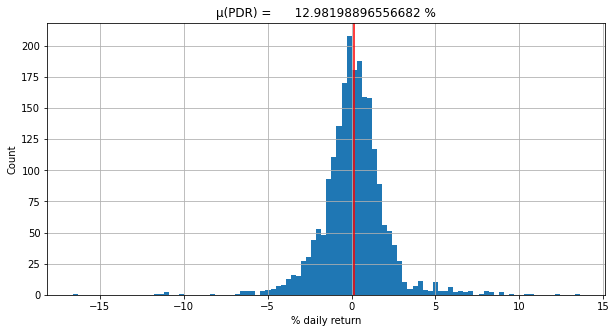

In [ ]:
#@title ---> Code for Vizualizing the portfolios' daily returns histogram (µ)
# Plotting a histogram for the portfolio daily return %
plt.figure( figsize = (10,5))
plt.hist( portfolio_1['portfolio daily % return'], bins=100);
plt.grid();
plt.title('µ(PDR) = ' + '     ' +   str(portfolio_1['portfolio daily % return'].mean() * 100 ) +' %'  );
plt.xlabel('% daily return');
plt.ylabel('Count');

# Plotting the line of the mean
plt.axvline(portfolio_1['portfolio daily % return'].mean(),color = 'red');

##### The <u>**standard deviation**</u> of portfolios' daily returns:  $\; \; \; \; \;$ **σ(PDR)**

In [ ]:
#@title ---> Code for Calculating the standard deviation of portfolios' daily returns
# Calculating the standard deviation of portfolios' daily returns, approximated to 2-decimal places
print("σ(PDR) = {:.5f} ".format( portfolio_1['portfolio daily % return'].std())  )

σ(PDR) = 1.97316 


Referencing the chart below:

we are 95% confident that the portfolio % daily returns is between

(-3.6830 %)   &   (4.2314 %)




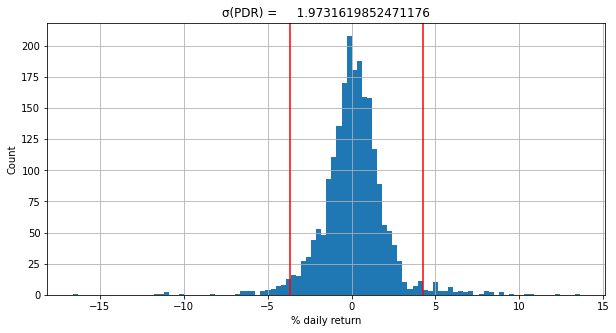

In [ ]:
#@title ---> Code for Vizualizing the portfolios' daily returns histogram  (σ)
# Plotting a histogram for the portfolio daily return %
plt.figure( figsize = (10,5))
plt.hist( portfolio_1['portfolio daily % return'], bins=100);
plt.grid();
plt.title('σ(PDR) =     ' + str(portfolio_1['portfolio daily % return'].std() ) );
plt.xlabel('% daily return');
plt.ylabel('Count');

# Plotting 95% confidence intervals threshholds
plt.axvline(np.percentile(portfolio_1['portfolio daily % return'],2.5),color = 'red');
plt.axvline(np.percentile(portfolio_1['portfolio daily % return'],97.5),color = 'red');

# Printing the confidence interval thresholds
print('Referencing the chart below:\n\nwe are 95% confident that the portfolio % daily returns is between\n\n({:.4f} %)   &   ({:.4f} %)\n\n'.format(np.percentile(portfolio_1['portfolio daily % return'],2.5), np.percentile(portfolio_1['portfolio daily % return'],97.5)))

##### Portfolio's <u>**Sharpe ratio**</u>


> It is a metric used by investors in order to calculate the <u>average return</u> earned in <u>excess</u> of <u>risk-free rate</u>, like that of government bonds, <u>per unit of risk</u>.

>*Daily Sharpe ratio* =  $\; \; \; \; \; \frac{\;\;\;\;\; µ(PDR) \;\;\;\;\;  - \;\;\;\;\; DRFR \;\;\;\;\;}{σ(PDR)}\; \; \; \; \; \; \; \;$, Where **DRFR** is the <u>daily risk-free rate</u>.  

> *Annual Sharpe ratio* =  $\; \; \; \; \;$ *Daily Sharpe ratio* $\; \; \; \; \;$ x $\; \; \; \; \;$  √(252)

>Also, it is called: <u>Risk-adjusted return</u>

>Finally, the <u>higher</u> the Sharpe ratio, the more <u>desirable</u> the investment will become.


###### <u>Daily</u>

In [ ]:
#@title ---> Code for Calculating The daily Sharpe ratio

# Calculating the portfolio's Sharpe ratio on a daily basis
daily_Sharpe_ratio = ( portfolio_1['portfolio daily % return'].mean() - ( DRFR / 100 ) ) / portfolio_1['portfolio daily % return'].std() 

# Viewing the daily Sharpe ratio, approximated to 3-decimal places
print('Daily Sharpe ratio = {:.5f}'. format(daily_Sharpe_ratio) )


Daily Sharpe ratio = 0.06579


###### <u>Annualy</u>

In [ ]:
#@title ---> Code for Annualizing Sharpe ratio
# Annualizing the daily Sharpe ratio
# By Multiplying to √(252)
print('Annual Sharpe ratio = {:.5f}'. format(daily_Sharpe_ratio * np.sqrt(252)) )

Annual Sharpe ratio = 1.04443


## ---
## ---
## ---

##  3) **<u>The Recommended Investment Decision </u>**

In [ ]:
#@title Decision Code
if (  ( daily_Sharpe_ratio * np.sqrt(252) ) >= Annual_sharpe_threshold ):
  print("\n\nACCEPTABLE PORTFOLIO!!!\n\n[Based on stocks' data from 2012 - 2020]\nIn order to meet your investment preferences, you may invest the $ {} with the following weights:\n\n".format(Allocation_amount) )
  for count, stock in enumerate( portfolio_1.columns[1:10] ):
   print(stock + ':')
   print('{}\n'.format(weights[count])) 
else:
  print('\n\nUnacceptable portfolio!!!\n\nPlease, Retry the simulation once more.') 



ACCEPTABLE PORTFOLIO!!!

[Based on stocks' data from 2012 - 2020]
In order to meet your investment preferences, you may invest the $ 140500 with the following weights:


AAPL:
0.1163078575688797

BA:
0.01611144337736803

T:
0.22777541699127124

MGM:
0.21690983693590568

AMZN:
0.03416288649913232

IBM:
0.06490771058427541

TSLA:
0.16568012172592586

GOOG:
0.09606671928948168

sp500:
0.06207800702776006

